In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import gmaps
from api_keys import (gkey)
from scipy.stats import linregress

In [2]:
#read data from conpressed file
vehicle_data = pd.read_csv("Data/vehicle_data.csv.gz",
               compression="gzip")

#strip extra spaces in field
vehicle_data['fuel_type'].str.rstrip().astype(str)
vehicle_data['elec_hybrid']= vehicle_data['fuel_type'].isin(['ELECTRIC','NONE','OTHER'])
vehicle_data


,vin,registration_class,zip,model_year,body_type,fuel_type,elec_hybrid
0,999407G3573,PAS,12866,1976,SUBN,GAS,False
1,9992313,PAS,13316,1924,CONV,GAS,False
2,998867,PAS,11501,1952,2DSD,GAS,False
3,9983692,PAS,10940,1936,2DSD,GAS,False
4,99782010525,PAS,11225,1978,2DSD,GAS,False
...,...,...,...,...,...,...,...
9375975,AAAAAAKE201612240,PAS,14621,1973,2DSD,GAS,False
9375976,,PAS,14120,1941,4DSD,GAS,False
9375977,,SRF,10580,1967,2DSD,GAS,False
9375978,,PAS,14047,1958,CONV,GAS,False


In [3]:
#Import AQI
aqi_df = pd.read_csv("Data/AQIndex.csv", index_col=0)
aqi_df.count()

Unnamed: 0.1       3126
zip                4689
AQI                4689
Category Number    4689
Category Name      4689
Pollutant          4689
Year               4689
dtype: int64

In [4]:
#Get Vehicle Data and AQI Data
veh_2009 = vehicle_data.loc[vehicle_data['model_year'].astype(int) <= 2009]

#2015
veh_2015 = vehicle_data.loc[vehicle_data['model_year'].astype(int) <= 2015]

#2020
veh_2020 = vehicle_data.loc[vehicle_data['model_year'].astype(int) <= 2020]

In [5]:
#Seperate Data on Fuel Type 2009
elec_09 = veh_2009.loc[veh_2009['elec_hybrid'] == True]
std_09 = veh_2009.loc[veh_2009['elec_hybrid'] == False]

#Rename Columns replace value
elec_09 = elec_09.rename(columns={"elec_hybrid": "Green"})
elec_09['Green'] =  1
elec_09['Green'].replace(np.nan,0)

std_09 = std_09.rename(columns={"elec_hybrid": "Standard"})
std_09['Standard'] = 1
std_09['Standard'].replace(np.nan,0)

#group by
new_elec_09 = elec_09.groupby('zip').agg({'Green':'size'})
new_std_09 = std_09.groupby('zip').agg({'Standard':'size'})

#Merge the 2009 data sets
df_2009 = pd.merge(new_elec_09, new_std_09, on=['zip'], how="outer" )
df_2009.replace(np.nan,0)


,Green,Standard
zip,,
10007,2.0,250
10019,1.0,1196
10023,1.0,2207
10032,1.0,2510
10036,3.0,1257
...,...,...
99703,0.0,1
99707,0.0,1
99712,0.0,1


In [6]:
#Seperate Data on Fuel Type 2009
elec_15 = veh_2015.loc[veh_2015['elec_hybrid'] == True]
std_15 = veh_2015.loc[veh_2015['elec_hybrid'] == False]

#Rename Columns replace value
elec_15 = elec_15.rename(columns={"elec_hybrid": "Green"})
elec_15['Green'] =  1
elec_15['Green'].replace(np.nan,0)

std_15 = std_15.rename(columns={"elec_hybrid": "Standard"})
std_15['Standard'] = 1
std_15['Standard'].replace(np.nan,0)

#group by
new_elec_15 = elec_15.groupby('zip').agg({'Green':'size'})
new_std_15 = std_15.groupby('zip').agg({'Standard':'size'})

#Merge the 2009 data sets
df_2015 = pd.merge(new_elec_15, new_std_15, on=['zip'], how="outer" )
df_2015.replace(np.nan,0)



,Green,Standard
zip,,
1035,1.0,0.0
6831,1.0,67.0
6876,1.0,0.0
6880,1.0,12.0
7032,1.0,14.0
...,...,...
99707,0.0,2.0
99712,0.0,1.0
99821,0.0,1.0


In [7]:
#Seperate Data on Fuel Type 2009
elec_20 = veh_2020.loc[veh_2020['elec_hybrid'] == True]
std_20 = veh_2020.loc[veh_2020['elec_hybrid'] == False]

#Rename Columns replace value
elec_20 = elec_20.rename(columns={"elec_hybrid": "Green"})
elec_20['Green'] =  1
elec_20['Green'].replace(np.nan,0)

std_20 = std_20.rename(columns={"elec_hybrid": "Standard"})
std_20['Standard'] = 1
std_20['Standard'].replace(np.nan,0)

#group by
new_elec_20 = elec_20.groupby('zip').agg({'Green':'size'})
new_std_20 = std_20.groupby('zip').agg({'Standard':'size'})

#Merge the 20 data sets
df_2020 = pd.merge(new_elec_20, new_std_20, on=['zip'], how="outer" )
df_2020.replace(np.nan,0)

,Green,Standard
zip,,
1035,1.0,0.0
2534,1.0,0.0
4107,1.0,0.0
6390,2.0,429.0
6437,1.0,3.0
...,...,...
99707,0.0,2.0
99712,0.0,1.0
99821,0.0,1.0


In [8]:
#Merge related AQI Data and drop unneeded columns, and remove NaN
#aqi call
aqi_group = aqi_df.groupby('Year')

#2009
aqi_2009 = aqi_group.get_group(2009)
veh_aqi_2009 = pd.merge(aqi_2009, df_2009, on=['zip'], how="inner" )
veh_aqi_2009 = veh_aqi_2009.drop(columns =['Category Number','Category Name',
                                          'Pollutant','Year'])
veh_aqi_2009['Green'] = veh_aqi_2009['Green'].fillna(0)
veh_aqi_2009['Standard'] = veh_aqi_2009['Standard'].fillna(0)

#2015
aqi_2015 = aqi_group.get_group(2015)
veh_aqi_2015 = pd.merge(aqi_2015, df_2015, on=['zip'], how="inner" )
veh_aqi_2015 = veh_aqi_2015.drop(columns =['Category Number','Category Name',
                                          'Pollutant','Year'])
veh_aqi_2015['Green'] = veh_aqi_2015['Green'].fillna(0)
veh_aqi_2015['Standard'] = veh_aqi_2015['Standard'].fillna(0)

#2020
aqi_2020 = aqi_group.get_group(2020)
veh_aqi_2020 = pd.merge(aqi_2020, df_2020, on=['zip'], how="inner" )
veh_aqi_2020 = veh_aqi_2020.drop(columns =['Category Number','Category Name',
                                          'Pollutant','Year'])
veh_aqi_2020['Green'] = veh_aqi_2020['Green'].fillna(0)
veh_aqi_2020['Standard'] = veh_aqi_2020['Standard'].fillna(0)


In [9]:
#Add Percentage of Green Vehicles
#2009
veh_count_09 = veh_aqi_2009['Standard']+ veh_aqi_2009['Green']
veh_aqi_2009['% Green']= (veh_aqi_2009['Green']/veh_count_09)
veh_aqi_2009['% Green']= veh_aqi_2009['% Green'].astype(float)


#2015
veh_count_15 = veh_aqi_2015['Standard']+ veh_aqi_2015['Green']
veh_aqi_2015['% Green']= (veh_aqi_2015['Green']/veh_count_15)
veh_aqi_2015['% Green']= veh_aqi_2015['% Green'].astype(float)


#2020
veh_count_20 = veh_aqi_2020['Standard']+ veh_aqi_2020['Green']
veh_aqi_2020['% Green']= (veh_aqi_2020['Green']/veh_count_20)
veh_aqi_2020['% Green']= veh_aqi_2020['% Green'].astype(float)


In [10]:
#View DataFrame
veh_aqi_2020

,Unnamed: 0.1,zip,AQI,Green,Standard,% Green
0,NaN,12032,42,0.0,751.0,0.000000
1,NaN,12108,42,0.0,331.0,0.000000
2,NaN,12134,42,2.0,2906.0,0.000688
3,NaN,12139,42,0.0,200.0,0.000000
4,NaN,12164,42,0.0,392.0,0.000000
...,...,...,...,...,...,...
1556,NaN,14784,49,0.0,569.0,0.000000
1557,NaN,14787,49,3.0,3126.0,0.000959
1558,NaN,14416,49,2.0,2857.0,0.000700
1559,NaN,14422,49,1.0,1577.0,0.000634


In [11]:
# #2009
max_2009 = veh_aqi_2009['% Green'].max()

# #2015
max_2015 = veh_aqi_2015['% Green'].max()

# #2020
max_2020 = veh_aqi_2020['% Green'].max()

#Print Max Values for each year
print(f'2009- {max_2009} | 2015- {max_2015} | 2020- {max_2020} ')

#Print max value rows
print(veh_aqi_2009[veh_aqi_2009['% Green'] == veh_aqi_2009['% Green'].max()])
print(veh_aqi_2015[veh_aqi_2015['% Green'] == veh_aqi_2015['% Green'].max()])
print(veh_aqi_2020[veh_aqi_2020['% Green'] == veh_aqi_2020['% Green'].max()])

2009- 0.008849557522123894 | 2015- 0.009302325581395349 | 2020- 0.02975557917109458 
      Unnamed: 0.1    zip  AQI  Green  Standard  % Green
1192        1194.0  12017   74    1.0       112  0.00885
      Unnamed: 0.1    zip  AQI  Green  Standard   % Green
1192        3921.0  12017   46    2.0     213.0  0.009302
     Unnamed: 0.1    zip  AQI  Green  Standard   % Green
740           NaN  11568   58   84.0    2739.0  0.029756


In [12]:
# #2009
mean_2009 = veh_aqi_2009['Green'].mean()
sum_2009 = veh_aqi_2009['Green'].sum()
# #2015
mean_2015 = veh_aqi_2015['Green'].mean()
sum_2015 = veh_aqi_2015['Green'].sum()
# #2020
mean_2020 = veh_aqi_2020['Green'].mean()
sum_2020 = veh_aqi_2020['Green'].sum()

#Create Series
df_year = ['2009', '2015', '2020']
df_mean = [mean_2009, mean_2015, mean_2020]
df_sum = [sum_2009, sum_2015, sum_2020]

#Create DF
year_series = pd.Series(df_year) 
mean_series = pd.Series(df_mean) 
sum_series = pd.Series(df_sum) 
year_change = { 'Year': year_series, 'Mean': mean_series, 'Sum': sum_series } 
  
year_change_df = pd.DataFrame(year_change) 
year_change_df

,Year,Mean,Sum
0,2009,0.044872,70.0
1,2015,1.349359,2105.0
2,2020,15.239590,23789.0


<function matplotlib.pyplot.show(close=None, block=None)>

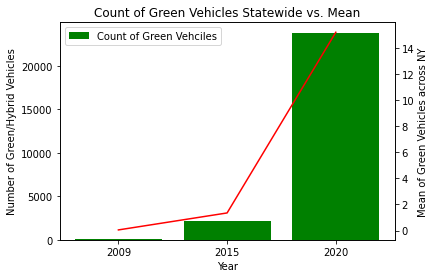

In [13]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
ax.bar(year_change_df['Year'], year_change_df["Sum"], color='g', label='Count of Green Vehciles')
ax2.plot(year_change_df['Year'], year_change_df["Mean"], color='r', label='Mean')

ax.set_xlabel('Year')
plt.title('Count of Green Vehicles Statewide vs. Mean')
ax.set_ylabel ('Number of Green/Hybrid Vehicles')
ax2.set_ylabel ('Mean of Green Vehicles across NY')
ax.legend(loc='best')

# save to file
plt.savefig('Images/Count of Green Vehicles Statewide vs. Mean.png', bbox_inches="tight", pad_inches=.3)
plt.show



In [14]:
#Scatter Plots (Function written by Team Member Deepa)

# function to plot a multi box plot
# requires group, title, y-axis label, filename to store png

def scatter_plot(x_values, y_values, title, x_label, y_label, file_name):
    # Plot the scatter plot for given year
    plt.figure(figsize=(8,6))
    plt.scatter(x_values, y_values)

    # Plot the linear regression model
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values, regress_values, "r-")
    
    # modified locations for graphs, change to Deepa's original code)
    plt.annotate(line_eq, (0.000, 45.0),fontsize=15,color="red")

    # Set the title and axis labels   
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Calculate the correlation coefficient
    print(f"The r-squared is: {rvalue**2}")
    
    # save to file
    plt.savefig(file_name, bbox_inches="tight", pad_inches=.3)

    plt.show()

The r-squared is: 2.2896326595606945e-07


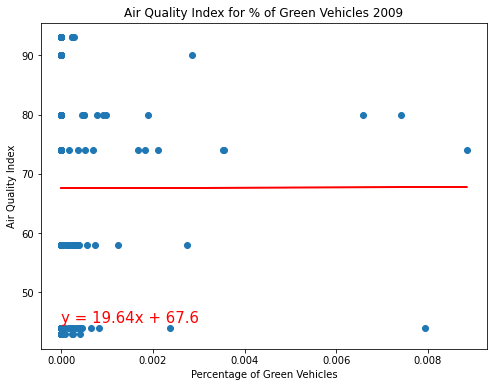

In [15]:
# plot scatter plot percent of green vehciles vs. AQI (2009)

# set x-values as age of vehile and y-values are AQI
x_values = veh_aqi_2009['% Green']
y_values = veh_aqi_2009['AQI']

# give a title, x-label and y-label
title = f"Air Quality Index for % of Green Vehicles 2009"
x_label = "Percentage of Green Vehicles"
y_label = "Air Quality Index"

# filename to store the .png file
file_name = f"Images/AQI_Green_Percent_2009.png"

scatter_plot(x_values, y_values, title, x_label, y_label, file_name)


The r-squared is: 0.0018160267526019039


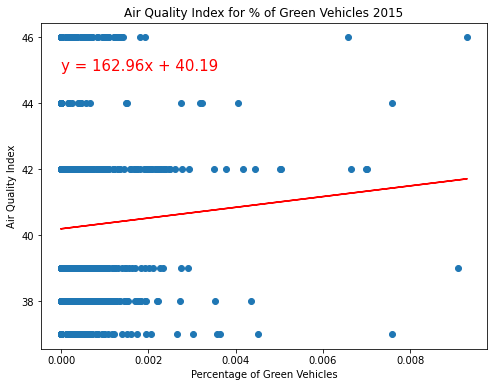

In [16]:
# plot scatter plot percent of green vehciles vs. AQI (2015)

# set x-values as age of vehile and y-values are AQI
x_values = veh_aqi_2015['% Green']
y_values = veh_aqi_2015['AQI']

# give a title, x-label and y-label
title = f"Air Quality Index for % of Green Vehicles 2015"
x_label = "Percentage of Green Vehicles"
y_label = "Air Quality Index"

# filename to store the .png file
file_name = f"Images/AQI_Green_Percent_2015.png"

scatter_plot(x_values, y_values, title, x_label, y_label, file_name)

The r-squared is: 0.16217576809651804


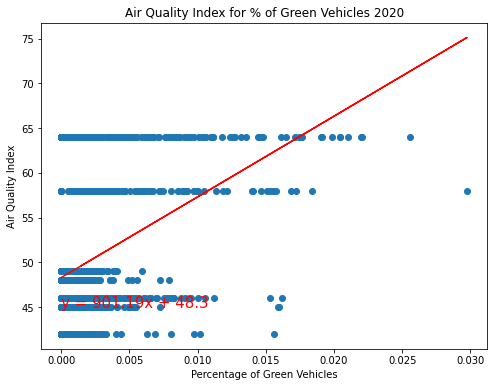

In [17]:
# plot scatter plot percent of green vehciles vs. AQI (2020)

# set x-values as age of vehile and y-values are AQI
x_values = veh_aqi_2020['% Green']
y_values = veh_aqi_2020['AQI']

# give a title, x-label and y-label
title = f"Air Quality Index for % of Green Vehicles 2020"
x_label = "Percentage of Green Vehicles"
y_label = "Air Quality Index"

# filename to store the .png file
file_name = f"Images/AQI_Green_2020.png"

scatter_plot(x_values, y_values, title, x_label, y_label, file_name)

In [18]:
#Read Lat Lng File
location_df = pd.read_csv("Data/newyork_cities.csv")
location_df = location_df.rename(columns= {'Zipcode':'zip'})
location_df = location_df.drop(columns =['Unnamed: 0','City','State'])

#Add Lat Lng to Year Files
combined_09 = pd.merge(veh_aqi_2009, location_df, on=['zip'], how="outer" )
combined_15 = pd.merge(veh_aqi_2015, location_df, on=['zip'], how="outer" )
combined_20 = pd.merge(veh_aqi_2020, location_df, on=['zip'], how="outer" )
combined_20


,Unnamed: 0.1,zip,AQI,Green,Standard,% Green,Latitude,Longitude
0,NaN,12032,42.0,0.0,751.0,0.000000,43.2295,-74.5171
1,NaN,12108,42.0,0.0,331.0,0.000000,43.4531,-74.4567
2,NaN,12134,42.0,2.0,2906.0,0.000688,43.2027,-74.1115
3,NaN,12139,42.0,0.0,200.0,0.000000,43.4032,-74.5363
4,NaN,12164,42.0,0.0,392.0,0.000000,43.4904,-74.3743
...,...,...,...,...,...,...,...,...
1559,NaN,14422,49.0,1.0,1577.0,0.000634,43.0814,-78.0645
1560,NaN,14427,49.0,2.0,1384.0,0.001443,42.6327,-78.0504
1561,NaN,6390,NaN,NaN,NaN,NaN,41.2640,-72.0174
1562,NaN,12727,NaN,NaN,NaN,NaN,41.6804,-74.9931


In [19]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [20]:
#Heat Map for 2009
# Store 'Lat' and 'Lng' into  locations 
locations_09 = combined_09[["Latitude", "Longitude"]].astype(float)

# Convert AQI to float and store
AQI_rate_09 = combined_09["AQI"].astype(float)

# Create a AQI Heatmap layer
fig = gmaps.figure()

heat_layer_09 = gmaps.heatmap_layer(locations_09, weights=AQI_rate_09, 
                                 dissipating=False, max_intensity=500,
                                 point_radius = 1)
fig.add_layer(heat_layer_09)

# Convert count of green vehicle to list
vehicle_count_09 = combined_09["Green"].tolist()

# Create Vehicle symbol layer
vehicle_layer_09 = gmaps.symbol_layer(
    locations_09, fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=2,
    info_box_content=[f"Green Vehicle count of: {vehicle}" for vehicle in vehicle_count_09]
)


#Combined map
fig = gmaps.figure(2009)

fig.add_layer(heat_layer_09)
fig.add_layer(vehicle_layer_09)

fig


Figure(layout=FigureLayout(height='420px'))

In [21]:
#Heat Map for 2015
# Store 'Lat' and 'Lng' into  locations 
locations_15 = combined_15[["Latitude", "Longitude"]].astype(float)

# Convert AQI to float and store
AQI_rate_15 = combined_15["AQI"].astype(float)

# Create a AQI Heatmap layer
fig = gmaps.figure()

heat_layer_15 = gmaps.heatmap_layer(locations_15, weights=AQI_rate_15, 
                                 dissipating=False, max_intensity=500,
                                 point_radius = 0.5)
fig.add_layer(heat_layer_15)

# Convert count of green vehicle to list
vehicle_count_15 = combined_15["Green"].tolist()

# Create Vehicle symbol layer
vehicle_layer_15 = gmaps.symbol_layer(
    locations_15, fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=2,
    info_box_content=[f"Green Vehicle count is: {vehicle}" for vehicle in vehicle_count_15]
)


#Combined map
fig = gmaps.figure(2015)

fig.add_layer(heat_layer_15)
fig.add_layer(vehicle_layer_15)

fig


Figure(layout=FigureLayout(height='420px'))

In [22]:
#Heat Map for 2020
# Store 'Lat' and 'Lng' into  locations 
locations_20 = combined_20[["Latitude", "Longitude"]].astype(float)

# Convert AQI to float and store
AQI_rate_20 = combined_20["AQI"].astype(float)

# Create a AQI Heatmap layer
fig = gmaps.figure()

heat_layer_20 = gmaps.heatmap_layer(locations_20, weights=AQI_rate_20, 
                                 dissipating=False, max_intensity=500,
                                 point_radius = 1)
fig.add_layer(heat_layer_20)

# Convert count of green vehicle to list
vehicle_count_20 = combined_20["Green"].tolist()

# Create Vehicle symbol layer
vehicle_layer_20 = gmaps.symbol_layer(
    locations_20, fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=2,
    info_box_content=[f"Green Vehicle count is: {vehicle}" for vehicle in vehicle_count_20]
)

#Combined map
fig = gmaps.figure(2020)

fig.add_layer(heat_layer_20)
fig.add_layer(vehicle_layer_20)

fig



Figure(layout=FigureLayout(height='420px'))